<a href="https://public.tableau.com/views/Book2_17380909011370/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link">
    <img src="img/icons8-tableau-software-48.png">
</a>

### Overview
This project focuses on analyzing traffic accidents in Texas, extracted from the larger US Accidents dataset. The primary goal is to clean and wrangle the data to ensure accuracy and reliability, then perform exploratory data analysis (EDA) to uncover meaningful insights. By examining factors such as accident severity, weather conditions, time, and location, this analysis aims to identify patterns and trends that can help understand the causes and characteristics of accidents in Texas.

### Dataset
####  About Dataset
This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, please visit [here](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents).


Since the scope of the project is limited to the state of Texas, the Texas data was extracted from the larger US Accidents dataset and used for further investigations.

The second dataset used is "Texas Cities by Population (2025)", which can be found [here] (https://www.texas-demographics.com/cities_by_population)



In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
# sns.set_theme(style="whitegrid")

In [3]:
# Load dataset
df = pd.read_csv('tx_accidents_mar2023.csv')
df.head(5)

ID   Source  Severity           Start_Time             End_Time  \
0  A-261009  Source2         2  2016-11-30 16:03:54  2016-11-30 17:20:00   
1  A-261010  Source2         2  2016-11-30 16:32:18  2016-11-30 17:47:02   
2  A-261011  Source2         2  2016-11-30 16:31:45  2016-11-30 17:46:34   
3  A-261012  Source2         2  2016-11-30 16:06:49  2016-11-30 17:27:00   
4  A-261013  Source2         3  2016-11-30 16:35:01  2016-11-30 17:49:39   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  30.336502 -97.755646      NaN      NaN          0.01  ...      False   
1  30.328165 -97.694305      NaN      NaN          0.00  ...      False   
2  30.326077 -97.692307      NaN      NaN          0.00  ...      False   
3  32.856014 -97.513084      NaN      NaN          0.01  ...      False   
4  32.797668 -97.212090      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False            Day   
1   False  False           False          False        False            Day   
2    True  False           False           True        False            Day   
3   False  False           False          False        False            Day   
4   False  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0            Day               Day                   Day  
1            Day               Day                   Day  
2            Day               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

### Data cleaning

In [4]:
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582837 entries, 0 to 582836
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     582837 non-null  object 
 1   Source                 582837 non-null  object 
 2   Severity               582837 non-null  int64  
 3   Start_Time             582837 non-null  object 
 4   End_Time               582837 non-null  object 
 5   Start_Lat              582837 non-null  float64
 6   Start_Lng              582837 non-null  float64
 7   End_Lat                223465 non-null  float64
 8   End_Lng                223465 non-null  float64
 9   Distance(mi)           582837 non-null  float64
 10  Description            582836 non-null  object 
 11  Street                 582216 non-null  object 
 12  City                   582837 non-null  object 
 13  County                 582837 non-null  object 
 14  State                  582837 non-nu

In [5]:
df.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  582837.000000  582837.000000  582837.000000  223465.000000   
mean        2.224124      31.049050     -96.963814      31.312593   
std         0.461688       1.433720       1.930680       1.471631   
min         1.000000      25.895210    -106.587378      26.010700   
25%         2.000000      29.761368     -97.690948      29.785060   
50%         2.000000      30.305925     -96.811250      30.488732   
75%         2.000000      32.759720     -95.500977      32.791932   
max         4.000000      36.478632     -93.519615      36.433321   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  223465.000000  582837.000000   574396.000000  356841.000000   
mean      -96.888897       0.282850       69.870334      67.117947   
std         1.798494       1.019170       16.454973      19.277384   
min      -106.587378       0.000000      -40.000000     -65.900000   
25%       -97.454560       0.000000       59.000000      55.000000   
50%       -96.800181       0.000000       72.000000      71.000000   
75%       -95.515773       0.149000       82.000000      81.000000   
max       -93.519751     194.729996      203.000000     110.000000   

         Humidity(%)   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  573610.000000  575107.000000   573645.000000    541510.000000   
mean       63.886744      29.679327        9.245994         8.609858   
std        22.502277       0.615371        2.150696         5.204679   
min         1.000000       0.290000        0.000000         0.000000   
25%        46.000000      29.400000       10.000000         5.000000   
50%        65.000000      29.840000       10.000000         8.000000   
75%        83.000000      30.020000       10.000000        12.000000   
max       100.000000      30.980000      111.000000       812.000000   

       Precipitation(in)  
count      353507.000000  
mean            0.008328  
std             0.059428  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             2.940000

In [6]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)


End_Lng                  359372
End_Lat                  359372
Precipitation(in)        229330
Wind_Chill(F)            225996
Wind_Speed(mph)           41327
Wind_Direction             9871
Humidity(%)                9227
Weather_Condition          9199
Visibility(mi)             9192
Temperature(F)             8441
Pressure(in)               7730
Weather_Timestamp          6551
Street                      621
Civil_Twilight              443
Astronomical_Twilight       443
Nautical_Twilight           443
Sunrise_Sunset              443
Airport_Code                 93
Timezone                     49
Description                   1
County                        0
City                          0
Source                        0
ID                            0
Start_Lng                     0
Distance(mi)                  0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Amenity                       0
Country 

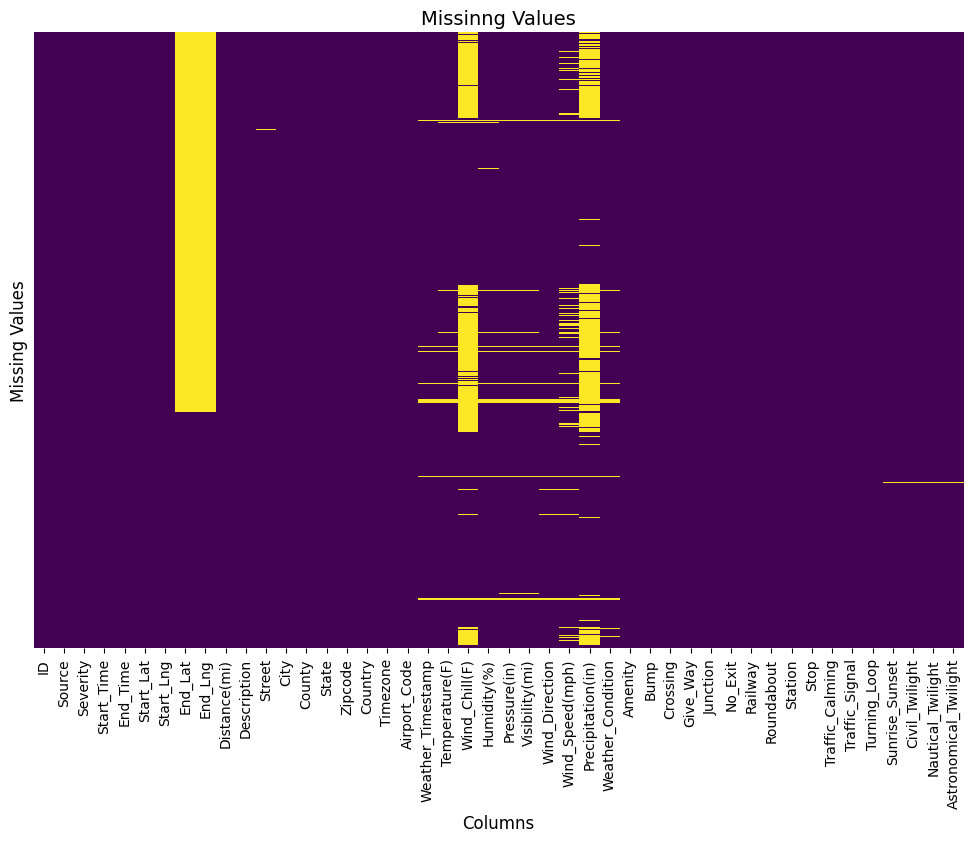

In [7]:
#visualize missing values using Seaborn`s heatmap
plt.figure(figsize=(12,8))

sns.heatmap(df.isnull(), cbar=False,cmap='viridis', yticklabels=False)
plt.title('Missinng Values', fontsize=14)
plt.xlabel('Columns',fontsize=12)
plt.ylabel('Missing Values', fontsize=12)

plt.show()

In [8]:
#missing percentage
missing_percentage = df.isnull().mean() * 100

In [9]:
print(missing_percentage.sort_values(ascending=False))

End_Lng                  61.659092
End_Lat                  61.659092
Precipitation(in)        39.347193
Wind_Chill(F)            38.775164
Wind_Speed(mph)           7.090662
Wind_Direction            1.693612
Humidity(%)               1.583118
Weather_Condition         1.578314
Visibility(mi)            1.577113
Temperature(F)            1.448261
Pressure(in)              1.326271
Weather_Timestamp         1.123985
Street                    0.106548
Civil_Twilight            0.076008
Astronomical_Twilight     0.076008
Nautical_Twilight         0.076008
Sunrise_Sunset            0.076008
Airport_Code              0.015956
Timezone                  0.008407
Description               0.000172
County                    0.000000
City                      0.000000
Source                    0.000000
ID                        0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

To maintain the quality and reliability of the dataset for analysis, we drop the columns with more than 5% missing values. 

In [10]:
# drop columns with more than 5%  missing values
df_clean = df.copy()
cols_to_keep = [col for col in df.columns if missing_percentage[col] <= 5]
df_clean = df[cols_to_keep]

In [11]:
print("Original dataset: " ,df.shape)
print("Cleaned dataset: " ,df_clean.shape)

Original dataset:  (582837, 46)
Cleaned dataset:  (582837, 41)


In [12]:
# Checking the remaing missing values
df_clean.isnull().mean().sort_values(ascending=False).head(15)

Wind_Direction           0.016936
Humidity(%)              0.015831
Weather_Condition        0.015783
Visibility(mi)           0.015771
Temperature(F)           0.014483
Pressure(in)             0.013263
Weather_Timestamp        0.011240
Street                   0.001065
Astronomical_Twilight    0.000760
Civil_Twilight           0.000760
Nautical_Twilight        0.000760
Sunrise_Sunset           0.000760
Airport_Code             0.000160
Timezone                 0.000084
Description              0.000002
dtype: float64

Handling the rest of missing values by dropping unrelated columns: `Nautical_Twilight`, `Astronomical_Twilight`,`Civil_Twilight`,`Airport_Code`,`Sunrise_Sunset`.

In [13]:
# Drop unrelated columns
cols_to_drop = ['Nautical_Twilight', 'Astronomical_Twilight','Civil_Twilight','Airport_Code','Sunrise_Sunset']
df_clean = df_clean.drop(cols_to_drop, axis=1)

Rows with missing values in columns where less than 1% of data is missing are removed to ensure data completeness while minimizing information loss. 

In [14]:
# Drop rows in columns with <1% missing values
cols_to_check = ['Start_Time', 'End_Time', 'Wind_Direction', 'Humidity(%)', 'Weather_Condition', 'Visibility(mi)', 'Temperature(F)', 'Pressure(in)', 'Weather_Timestamp',
                'Street', 'Timezone', 'Description']
df_tx = df_clean.dropna(subset=cols_to_check)


In [15]:
print(df.shape)
print(df_clean.shape)
print(df_tx.shape)

(582837, 46)
(582837, 36)
(567025, 36)


In [16]:
#Check for missing values
df_tx.isnull().mean().sort_values(ascending=False)

ID                   0.0
Source               0.0
Severity             0.0
Start_Time           0.0
End_Time             0.0
Start_Lat            0.0
Start_Lng            0.0
Distance(mi)         0.0
Description          0.0
Street               0.0
City                 0.0
County               0.0
State                0.0
Zipcode              0.0
Country              0.0
Timezone             0.0
Weather_Timestamp    0.0
Temperature(F)       0.0
Humidity(%)          0.0
Pressure(in)         0.0
Visibility(mi)       0.0
Wind_Direction       0.0
Weather_Condition    0.0
Amenity              0.0
Bump                 0.0
Crossing             0.0
Give_Way             0.0
Junction             0.0
No_Exit              0.0
Railway              0.0
Roundabout           0.0
Station              0.0
Stop                 0.0
Traffic_Calming      0.0
Traffic_Signal       0.0
Turning_Loop         0.0
dtype: float64

In [17]:
#check for duplicates
print('Number of duplicates: ',df_clean.duplicated().sum())

Number of duplicates:  0


In [18]:
df_tx.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

### Fix datatypes

For further trend analysis, we need to extract accident timestamps. To achieve this, we must convert `Start_Time` and `End_Time` to the datetime format.

In [19]:
# Chekcing the data types of the columns
print(df_tx['Start_Time'].dtype)
print(df_tx['End_Time'].dtype)

object
object


In [20]:
# Convert Start_Time and End_Time to datetime
df_tx.loc[:, 'Start_Time'] = pd.to_datetime(df_tx['Start_Time'],errors='coerce')
df_tx.loc[:, 'End_Time'] = pd.to_datetime(df_tx['End_Time'],errors='coerce')

# Drop rows where conversion failed
df_tx = df_tx[df_tx['Start_Time'].notna() & df_tx['End_Time'].notna()]

print(df_tx['Start_Time'].dtype)
print(df_tx['End_Time'].dtype)

object
object


In [21]:
# Save cleaned dataset
df_tx.to_csv('cleaned_tx_accidents.csv', index=False)
df_tx = pd.read_csv('cleaned_tx_accidents.csv', parse_dates=['Start_Time', 'End_Time'])

In [22]:
print(df_tx.dtypes)

ID                           object
Source                       object
Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
Distance(mi)                float64
Description                  object
Street                       object
City                         object
County                       object
State                        object
Zipcode                      object
Country                      object
Timezone                     object
Weather_Timestamp            object
Temperature(F)              float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               object
Weather_Condition            object
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                    

###  EDA
#### Severity
Exploring the severity of accidents, where the severity is a number between 1 and 4:

- 1 indicates the least impact on traffic (e.g., short delays caused by the accident).
- 4 indicates a significant impact on traffic (e.g., long delays).



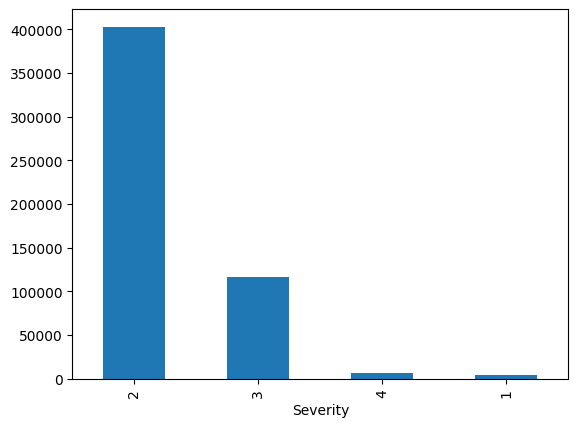

In [23]:
# plt.figure(figsize=(8,6))
df_tx['Severity'].value_counts().plot(kind='bar')

plt.show()

The majority of accidents fall into category 2.










#### The Top 20 Cities and Counties With the Most Accidents

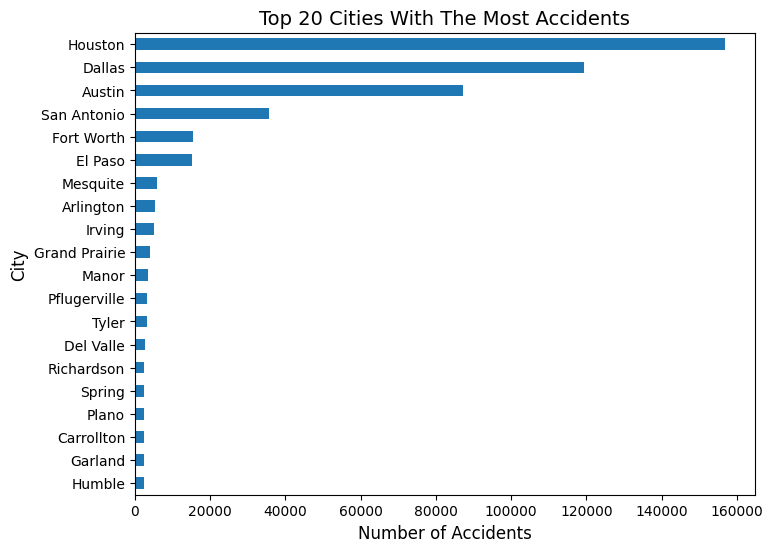

In [24]:
#Accidents by city
plt.figure(figsize=(8,6))
top_cities =df_tx['City'].value_counts().head(20).sort_values()
top_cities.plot(kind='barh')
plt.title('Top 20 Cities With The Most Accidents', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()


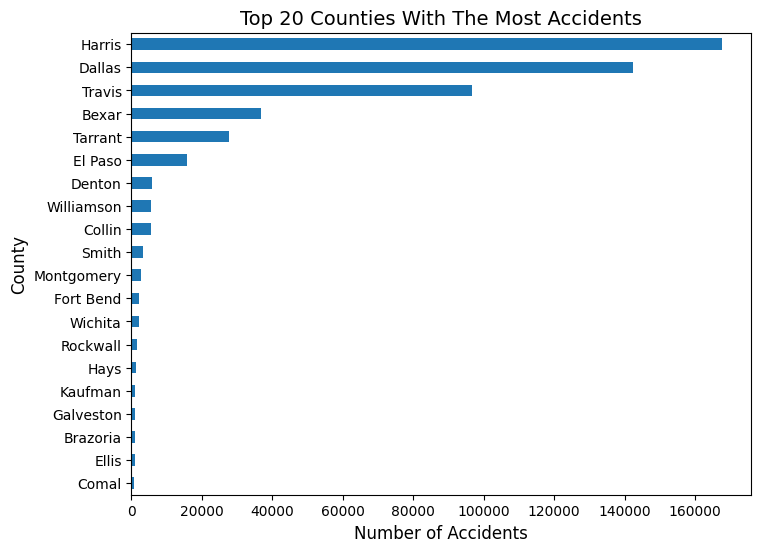

In [25]:
#Accidents by county
plt.figure(figsize=(8,6))
top_counties = df_tx['County'].value_counts().head(20).sort_values()
top_counties.plot(kind='barh')
plt.title('Top 20 Counties With The Most Accidents', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('County', fontsize=12)

plt.show()

Predictably, the cities and counties with the largest populations have the highest number of accidents.



### Time analysis
#### Accidents by the time of the day

In [26]:
df_tx.dtypes

ID                           object
Source                       object
Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
Distance(mi)                float64
Description                  object
Street                       object
City                         object
County                       object
State                        object
Zipcode                      object
Country                      object
Timezone                     object
Weather_Timestamp            object
Temperature(F)              float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               object
Weather_Condition            object
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                    

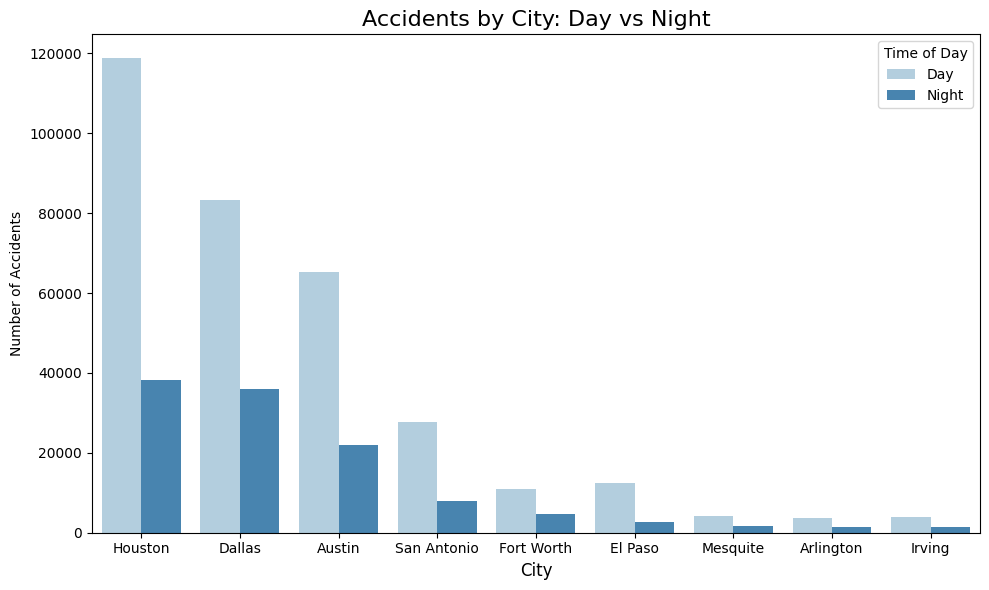

In [27]:

def plot_accidents_by_category(df, category_column, top_n=10):
    
    df.loc[:, 'Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    
    # Drop rows with missing Start_Time
    df = df.dropna(subset=['Start_Time'])
    
    # Extract the hour from the Start_Time column
    df.loc[:, 'hour'] = df['Start_Time'].dt.hour
        
    # Classify accidents into day or night
    def day_night(hour):
        if 6 <= hour < 18:
            return 'Day'
        else:
            return 'Night'
            
    
    # Apply function to the hour column
    df.loc[:, 'Day_Night'] = df['hour'].apply(day_night)

    # Get the top N categories with the most accidents
    top_categories = df[category_column].value_counts().head(top_n).index

    # Filter data for top N categories
    df_top_categories = df[df[category_column].isin(top_categories)]

    # Get the order of categories based on their counts
    order = df_top_categories[category_column].value_counts().index[:-1]

    # Create the countplot for accidents by category and day/night
    plt.figure(figsize=(10, 6))
    sns.set_palette("rocket")
    sns.countplot(data=df_top_categories, x=category_column, hue='Day_Night', order=order, palette='Blues')

    plt.title(f'Accidents by {category_column.capitalize()}: Day vs Night', fontsize=16)
    plt.xlabel(f'{category_column.capitalize()}', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=10)
    plt.legend(title='Time of Day', loc='upper right', fontsize=10)
    plt.tight_layout()

    plt.show()

# Plotting accidents by city: day vs night
plot_accidents_by_category(df_tx, 'City', top_n=10)

# Plotting accidents by county: day vs night
# plot_accidents_by_category(df_tx, 'County', top_n=10)


Surprisingly, most accidents occurred during the daytime.


#### Accidents by the hour of the day

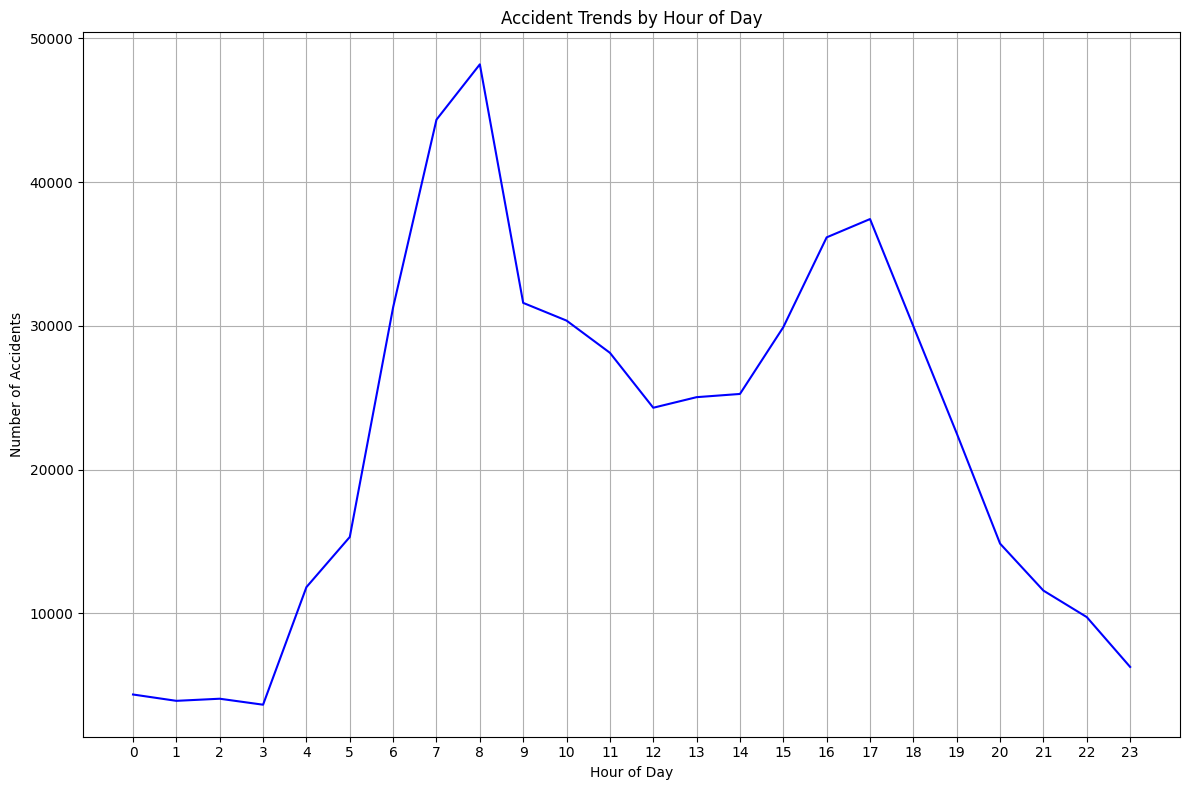

In [28]:
# Extract the month from the Start_Time column
df_tx.loc[:, 'Month'] = df_tx['Start_Time'].dt.month
df_tx.loc[:, 'hour'] = df_tx['Start_Time'].dt.hour

#Accidentd by hour
plt.figure(figsize=(12,8))
hour_accidents = df_tx['hour'].value_counts().sort_index()
sns.lineplot(x=hour_accidents.index, y=hour_accidents.values, markers='o', color='b')
plt.title('Accident Trends by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))  # Show all 24 hours
plt.grid(True)
plt.tight_layout()
plt.show()

The peak of accidents occurs at 8 AM. The trend shows that the number of accidents increases between 5 AM and 8 AM, slows down during late morning and noon, and rises again between 2 PM and 5 PM, indicating that the majority of accidents happen during rush hours.

#### Accidents by the month

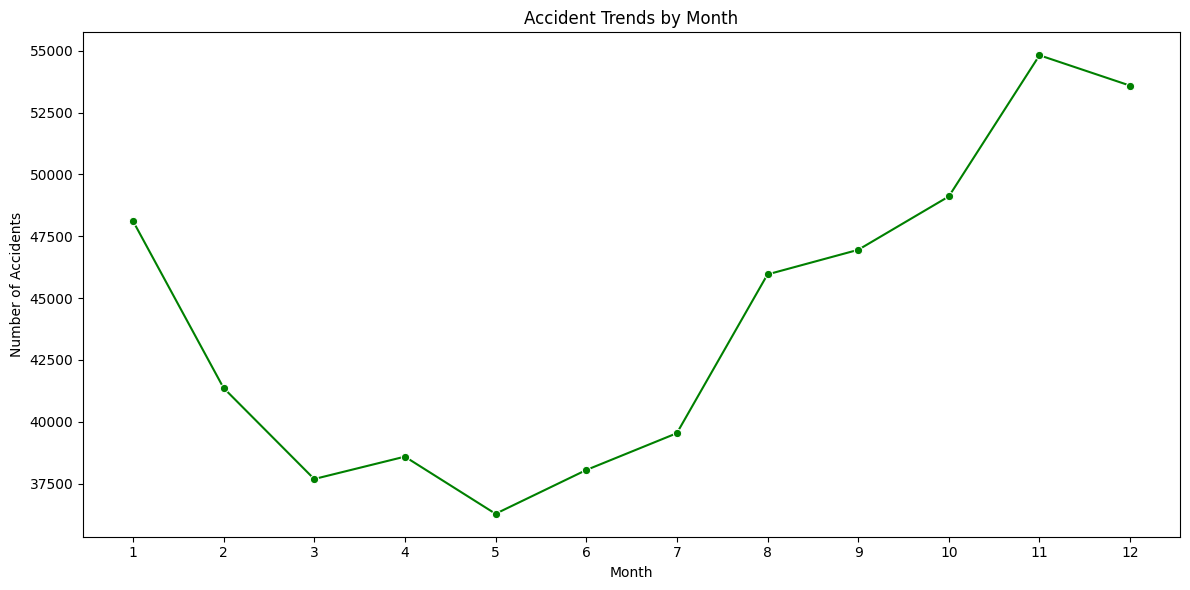

In [29]:
plt.figure(figsize=(12, 6))
monthly_accidents = df_tx['Month'].value_counts().sort_index()  # Count accidents by month
sns.lineplot(x=monthly_accidents.index, y=monthly_accidents.values, marker='o', color='g')
plt.title('Accident Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13)) 
plt.tight_layout()
plt.show()

The number of accidents starts increasing from late October to January, coinciding with the holiday season. The peak occurs at the end of November, around the Thanksgiving holiday and peak travel time. Conversely, the lowest number of accidents is observed in May, with accident rates generally remaining low during the summer months.

### Effect of Road Features on Accident Frequency: Houston vs Dallas

In [30]:
# Selecting columns with the road features
# df_tx.columns
road_features = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

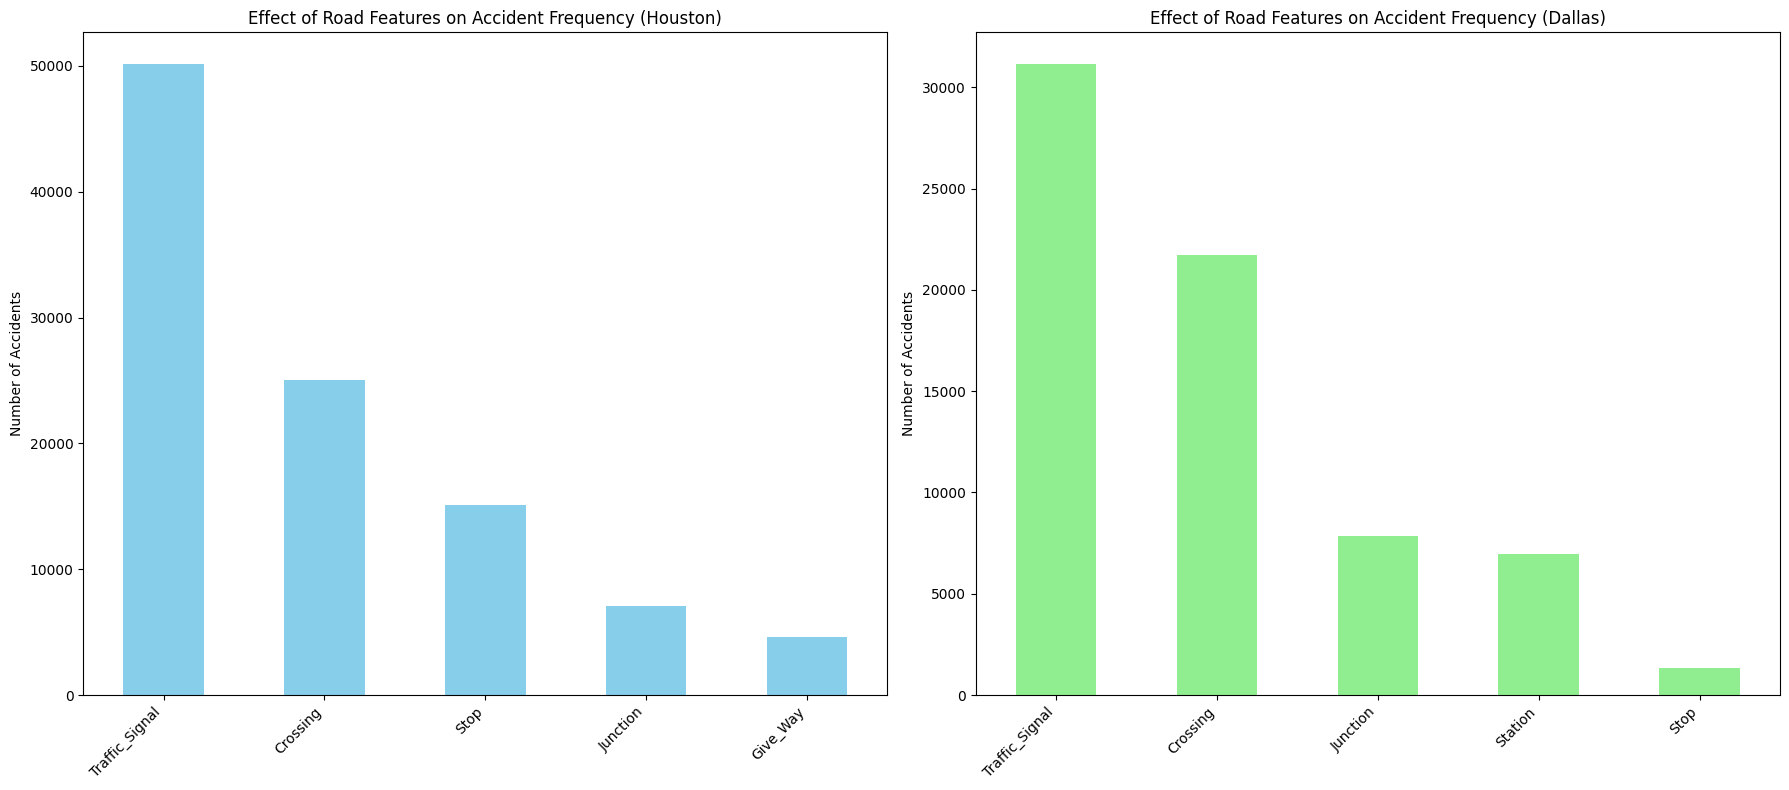

In [31]:
# Filter data for accidents in Houston

houston_data = df_tx[df_tx['City'] == 'Houston']

# Sum the occurrences of each road feature for Houston
houston_feature_impact = houston_data[road_features].sum().sort_values(ascending=False).head(5)

# Filter data for accidents in Dallas
dallas_data = df_tx[df_tx['City'] == 'Dallas']

# Sum the occurrences of each road feature for Dallas
dallas_feature_impact = dallas_data[road_features].sum().sort_values(ascending=False).head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot Houston feature impact
houston_feature_impact.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Effect of Road Features on Accident Frequency (Houston)')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_xticklabels(houston_feature_impact.index, rotation=45, ha='right')

# Plot Dallas feature impact
dallas_feature_impact.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Effect of Road Features on Accident Frequency (Dallas)')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_xticklabels(dallas_feature_impact.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


The two cities share one common pattern: `Traffic_Signal` and `Crossing` have the greatest impact on accident frequency in both Dallas and Houston. However, the `Stop` feature has a greater impact on accident frequency in Houston than in Dallas. Additionally, `Give_Way` ranks among the top 5 road features in Houston, while in Dallas, the `Stop` signal causes significantly fewer accidents

### Correlation between accidents and temperature

Text(0.5, 1.0, 'Temperature Distribution')

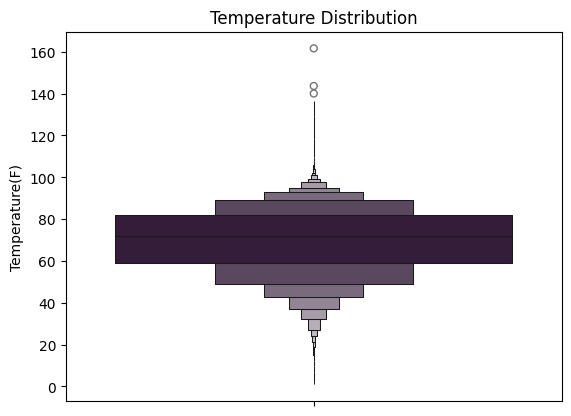

In [32]:
sns.boxenplot(df_tx['Temperature(F)'])
plt.title('Temperature Distribution')

As we can see, the most accidents occur in the temperature range between 60°F and 80°F. Additionally, there are three outliers showing temperatures in the range from 140°F to 160°F.

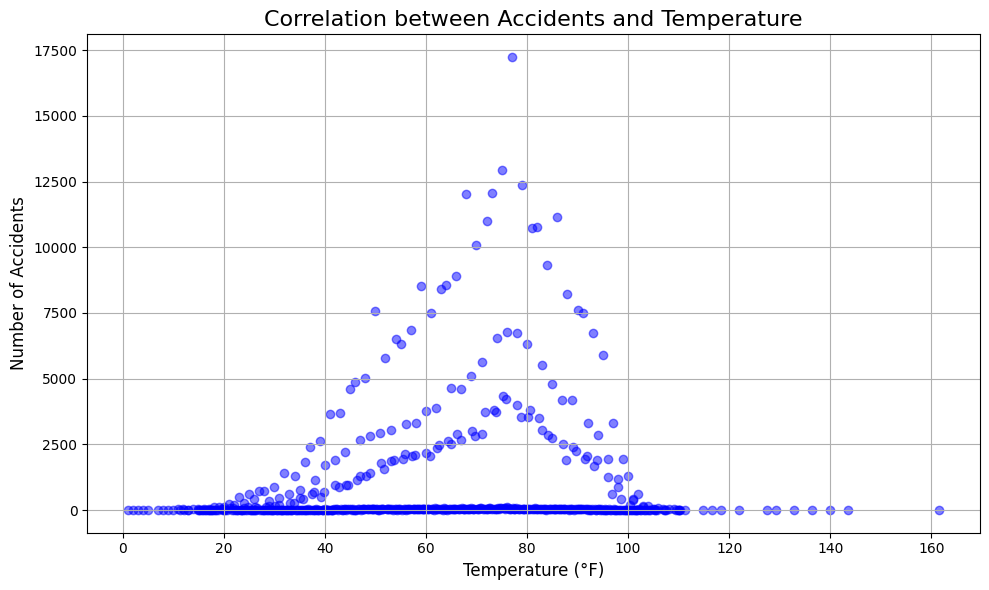

Correlation between accidents and temperature: -0.2916773689827108


In [33]:
# Group by temperature and count the accidents
temperature_accidents = df_tx.groupby('Temperature(F)').size()
# Plot the correlation between accidents and temperature
plt.figure(figsize=(10, 6))
plt.scatter(temperature_accidents.index, temperature_accidents.values, color='blue', alpha=0.5)
plt.title('Correlation between Accidents and Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, calculate the correlation coefficient between accidents and temperature
correlation = df_tx['Temperature(F)'].corr(df_tx.groupby('Temperature(F)').size())
print(f'Correlation between accidents and temperature: {correlation}')


The correlation between accidents and temperature is -0.1997,  which indicates a weak negative correlation. In other words, as the temperature increases, there seems to be a slight decrease in accident frequency, though the relationship is not strong enough to be of significant practical importance. 

### Number of accidents based on weather conditions


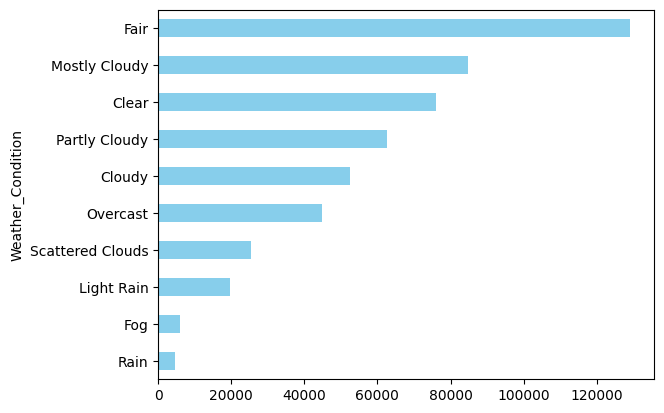

In [34]:
# Weather conditions
weather_cond = df_tx['Weather_Condition'].value_counts().head(10).sort_values()
weather_cond.plot(kind='barh', color='skyblue')
plt.show()
# weather_cond

The most accidents occurred during fair weather, with mostly cloudy or clear conditions.

### Weather conditions contributing the most to the overall severity in Texas

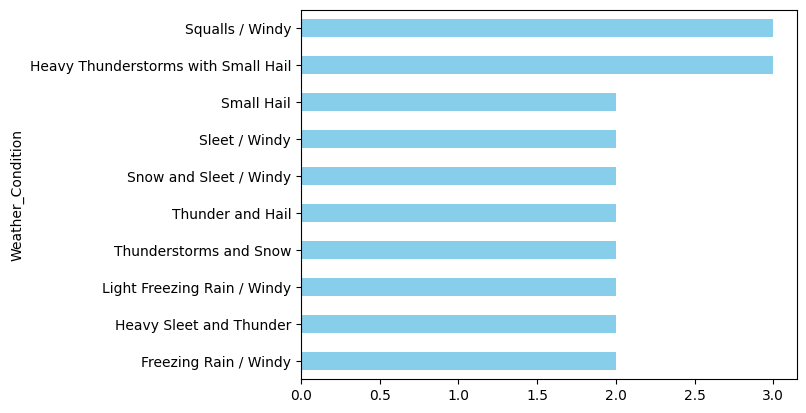

In [35]:

severity_weather = df_tx.groupby('Weather_Condition')['Severity'].sum().sort_values(ascending=True).head(10)
# print(severity_weather)
severity_weather.plot(kind='barh', color='skyblue')
plt.show()

### Effect of visibility on the number of accidents

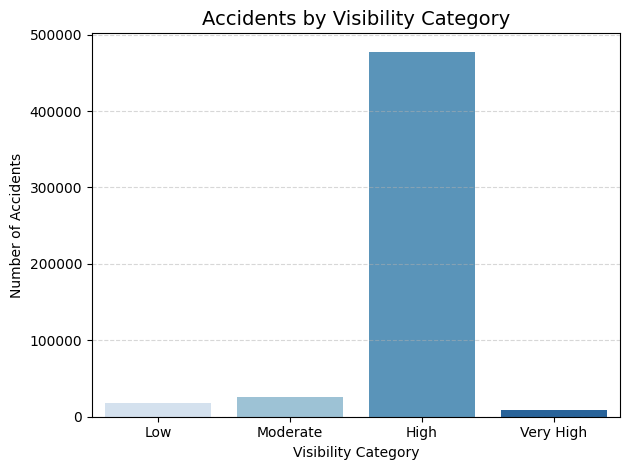

In [36]:
# Sort values into bins
df_tx['Visibility_Category'] = pd.cut(
    df_tx['Visibility(mi)'], 
    bins=[0, 2, 5, 10, 15], 
    labels=['Low', 'Moderate', 'High', 'Very High']
)

visibility_category_accidents = df_tx['Visibility_Category'].value_counts().sort_index()

# plt.figure(figsize=(8, 6))
sns.barplot(
    x=visibility_category_accidents.index, 
    y=visibility_category_accidents.values, 
    palette='Blues', hue=visibility_category_accidents.index
)
plt.title('Accidents by Visibility Category', fontsize=14)
plt.xlabel('Visibility Category', fontsize=10)
plt.ylabel('Number of Accidents', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Surprisingly, the most accidents occur in good visibility.

### Car accidents by the city

In [37]:
# Count the number of accidents by city
df_tx['City'].value_counts()
city_accidents = df_tx['City'].value_counts()

In [38]:
highest_accidents = city_accidents[city_accidents >= 1000]
print('Cities with the highest number of accidents (more than 1000):')
highest_accidents

Cities with the highest number of accidents (more than 1000):


City
Houston          156968
Dallas           119311
Austin            87126
San Antonio       35686
Fort Worth        15463
El Paso           15293
Mesquite           5903
Arlington          5281
Irving             5171
Grand Prairie      3951
Manor              3487
Pflugerville       3281
Tyler              3215
Del Valle          2742
Richardson         2492
Spring             2454
Plano              2438
Carrollton         2431
Garland            2414
Humble             2344
Wichita Falls      2093
Lewisville         1913
Denton             1737
Kingwood           1435
Round Rock         1411
Lancaster          1147
Pasadena           1102
Duncanville        1101
Balch Springs      1099
Conroe             1029
Rockwall           1003
Name: count, dtype: int64

In [39]:
lowest_accidents = city_accidents[city_accidents <= 1000]
print('Cities with the lowest number of accidents (less than 1000):')
lowest_accidents

Cities with the lowest number of accidents (less than 1000):


City
Grapevine     909
Katy          834
Webster       770
Buda          764
Bedford       755
             ... 
Bluffton        1
Springlake      1
San Saba        1
Brashear        1
Woodsboro       1
Name: count, Length: 816, dtype: int64

### Accidents per population
Obviously, the number of accidents is higher in the most populated cities. To gain a better understanding, we will analyze accidents per population. For this, a second dataset containing Texas demographics will be used.

#### Creating a new dataset with city names, the number of accidents, and their populations.

In [40]:
# Create a datadrame of the city accidents
city_accidents = df_tx.groupby('City').size().reset_index(name='Number of Accidents')

In [41]:
city_accidents.sort_values(by='Number of Accidents', ascending=False)

City  Number of Accidents
354      Houston               156968
188       Dallas               119311
33        Austin                87126
673  San Antonio                35686
264   Fort Worth                15463
..           ...                  ...
39     Ballinger                    1
41       Bandera                    1
381       Jermyn                    1
827       Wilson                    1
823  Willow City                    1

[847 rows x 2 columns]

In [42]:
# Clean the 'City' name column: remove 'city', 'town', 'village'
def remove_city(city_name):
    if city_name.lower().endswith(" city"):
        return city_name.rsplit(' ',1)[0]
    elif city_name.lower().endswith(" town"):
        return city_name.rsplit(' ', 1)[0]
    elif city_name.lower().endswith(" village"):
        return city_name.rsplit(' ', 1)[0]
    return city_name

city_accidents['City'] = city_accidents['City'].apply(remove_city)
city_accidents.to_csv('city_accidents.csv', index=False)

In [43]:
# Read the population data dataset
demograph_df = pd.read_csv('texas_population.csv')


In [44]:
# Cleainng the 'City' column
demograph_df['City'] = demograph_df['City'].apply(remove_city)
demograph_df = demograph_df.rename(columns={'City': 'City'})
demograph_df.to_csv('texas_population.csv', index=False)

In [45]:
demograph_df.head()

City population
0     Abbott        364
1  Abernathy      2,814
2    Abilene    129,043
3    Abram        1,832
4    Acala           31

In [46]:
# Merge city_accidents df with population data
merged_df = pd.merge(city_accidents, demograph_df, on ='City', how ='left')
merged_df.to_csv('acc_demog.csv', index=False)

In [47]:
print(city_accidents.shape)
print(merged_df.shape)


(847, 2)
(849, 3)


In [48]:
# Check datatypes
merged_df.dtypes

City                   object
Number of Accidents     int64
population             object
dtype: object

In [49]:
print("Missing values: ", merged_df['population'].isnull().sum())


Missing values:  164


####  Dealing with missing values in merged_df

In [50]:
# Remove commas from population column 
merged_df['population'] = merged_df['population'].str.replace(',', '')

In [51]:
# Convert population into integer
merged_df['population'] = pd.to_numeric(merged_df['population'])

In [52]:
# Accidents per Population
merged_df['Accidents_Population'] = merged_df['Number of Accidents'] / merged_df['population']

In [53]:
merged_df.head()

City  Number of Accidents  population  Accidents_Population
0     Abbott                   32       364.0              0.087912
1  Abernathy                    5      2814.0              0.001777
2    Abilene                   71    129043.0              0.000550
3    Addison                  123     17100.0              0.007193
4     Adkins                   10         NaN                   NaN

In [54]:
merged_df['Accidents_Population'].sort_values(ascending=False).head(10)

658    0.293103
330    0.269231
172    0.264407
792    0.180905
473    0.172547
359    0.144362
176    0.141176
813    0.107317
812    0.099025
5      0.092308
Name: Accidents_Population, dtype: float64

In [55]:
# Dropping missing values
merged_clean_df = merged_df.dropna(subset = ['population','Accidents_Population'])
merged_clean_df.to_csv('acc_per_capita.csv', index=False)

In [56]:
print(merged_df.shape)
print(merged_clean_df.shape)

(849, 4)
(685, 4)


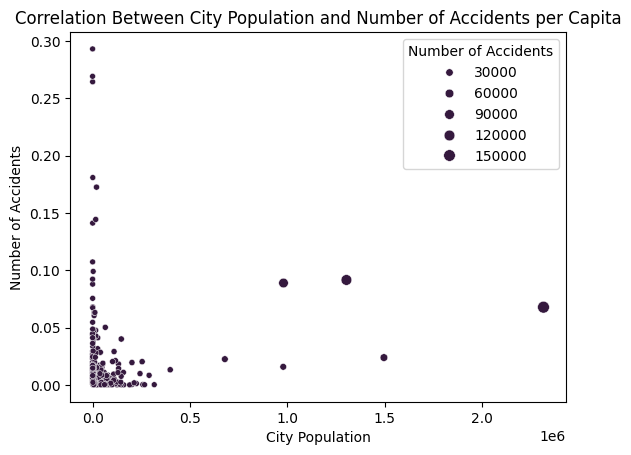

In [57]:
sns.scatterplot(data=merged_clean_df, x='population', y='Accidents_Population', size='Number of Accidents')
plt.title('Correlation Between City Population and Number of Accidents per Capita', fontsize=12)
plt.xlabel('City Population', fontsize=10)
plt.ylabel('Number of Accidents', fontsize=10)

plt.show()

In [58]:
top_cities = merged_df.sort_values(by='Accidents_Population', ascending=False).head(10)

# Display the city names and their accidents per population ratio
print(top_cities[['City', 'population','Accidents_Population','Number of Accidents']])

                City  population  Accidents_Population  Number of Accidents
658   Round Mountain       116.0              0.293103                   34
330          Harwood        52.0              0.269231                   14
172         Coupland       295.0              0.264407                   78
792         Von Ormy      1194.0              0.180905                  216
473            Manor     20209.0              0.172547                 3487
359           Humble     16237.0              0.144362                 2344
176        Creedmoor       425.0              0.141176                   60
813        Westbrook       205.0              0.107317                   22
812  West Lake Hills      3181.0              0.099025                  315
5             Adrian       130.0              0.092308                   12


In [59]:
top_cities = merged_df.sort_values(by='population', ascending=False).head(10)

# Display the city names and their accidents per population ratio
print(top_cities[['City', 'population','Accidents_Population', 'Number of Accidents']])

               City  population  Accidents_Population  Number of Accidents
355         Houston   2314157.0              0.067829               156968
675     San Antonio   1495295.0              0.023866                35686
189          Dallas   1302868.0              0.091576               119311
33           Austin    979882.0              0.088915                87126
265      Fort Worth    978468.0              0.015803                15463
230         El Paso    678958.0              0.022524                15293
27        Arlington    398431.0              0.013254                 5281
168  Corpus Christi    316595.0              0.000253                   80
597           Plano    290190.0              0.008401                 2438
462         Lubbock    266878.0              0.000210                   56


#### Key Observations:
**Large Cities**:

1. Houston:

- Population: 2,314,157 (largest).
- Total Accidents: 156,968 (highest number of accidents).
- Accidents_Population: 0.0678 (6.78% of the population).
Despite the high number of accidents, the relative rate is lower compared to smaller cities.
2. Dallas:

- Population: 1,302,868.
- Total Accidents: 119,311.
- Accidents_Population: 0.0916 (9.16% of the population).
Higher relative rate compared to Houston but still lower than smaller cities.
3. San Antonio & Austin:

- San Antonio has a lower Accidents_Population (2.39%) compared to Austin (8.89%), though both cities have high populations.
- San Antonio has a significantly lower total number of accidents (35,686) than Austin (87,126), suggesting differences in urban infrastructure, traffic, or reporting.

**Small Cities**:

1. Round Mountain & Harwood:

- Tiny populations of 116 and 52, respectively.
- Extremely high Accidents_Population ratios (29.31% and 26.92%).
- These ratios highlight the disproportionate impact of a small number of accidents in very small populations.

2. Coupland, Von Ormy, Manor, and Humble:
- Population ranges from 295 to 20,209.
- High Accidents_Population ratios between 14.43% (Humble) and 26.44% (Coupland).

**Conclusions**:
1. Higher Total Accidents in Large Cities:
Larger cities (e.g., Houston, Dallas, Austin) have the most total accidents due to higher population density and traffic volume.
However, their Accidents_Population ratios are generally lower compared to small cities, indicating a diluted impact when accounting for population size.

2. Disproportionate Impact in Small Cities:
Smaller cities like Round Mountain and Harwood have extremely high accident rates relative to their population size.
A single accident in these towns affects a significant percentage of the population, making the ratio very sensitive to small changes.



### The Map: Accidents in Texas


In [60]:
# Count accidents by coordinates
df_tx[['Start_Lat','Start_Lng']].isnull().sum()
accidents_counts = df_tx.groupby(['Start_Lat','Start_Lng']).size().reset_index(name='Num_of_accidents')

In [61]:
print(accidents_counts.head())

   Start_Lat  Start_Lng  Num_of_accidents
0  25.895210 -97.407562                 1
1  25.911440 -97.511864                 1
2  25.916941 -97.414200                 1
3  25.918209 -97.512283                 1
4  25.924540 -97.482933                 1


In [62]:
heatmap_data = accidents_counts[['Start_Lat','Start_Lng','Num_of_accidents']].values.tolist()

map_object = folium.Map(location=[accidents_counts['Start_Lat'].mean(), accidents_counts['Start_Lng'].mean()], zoom_start=6,tiles="Cartodb Positron")
HeatMap(data=heatmap_data, radius=10, blur=10).add_to(map_object)
map_object.save('tx_acc_heatmap.html') # Save the map to an HTML file
map_object
